## Data Analysis and Preparation of Amazon Fine Food reviews


This notebook will discuss the overall structure of the amazon fine food reviews taken from this kaggle page: https://www.kaggle.com/snap/amazon-fine-food-reviews/data

The metadata of the column is as below:<br>
Id<br>
ProductId - unique identifier for the product<br>
UserId - unqiue identifier for the user<br>
ProfileName<br>
HelpfulnessNumerator - number of users who found the review helpful<br>
HelpfulnessDenominator - number of users who indicated whether they found the review helpful<br>
Score - rating between 1 and 5<br>
Time - timestamp for the review<br>
Summary - brief summary of the review<br>
Text - text of the review<br>

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')


input_location = '/Users/momori/Downloads/amazon-fine-food-reviews/reviews.csv'
output_location = '/Users/momori/Downloads/amazon-fine-food-reviews/reviews_processed.csv'

In [10]:
data = pd.read_csv(input_location)

In [46]:
len(data['UserId'].unique()), len(data['UserId'])

(256059, 568454)

In [11]:
data.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


Couple things we want to check here:<br>
- uniqueness of the Ids
- distribution of the HelpfulnessNumerator/HelpfulnessDenominator/Score
- create a new column for HelpfulnessRatio, which is HelpfulnessNumerator/HelpfulnessDenominator for each Id


In [21]:
data['HelpfulnessRatio'] = data['HelpfulnessNumerator']/data['HelpfulnessDenominator']

In [23]:
data['HelpfulnessRatio'].describe()

count    298402.000000
mean          0.776975
std           0.346321
min           0.000000
25%           0.600000
50%           1.000000
75%           1.000000
max           3.000000
Name: HelpfulnessRatio, dtype: float64

In [14]:
#check for uniqueness of Ids
len(data['Id'].unique())

568454

ID count looks good, let's check the distribution of the helpfulness numerator/denominator/ratio/Score

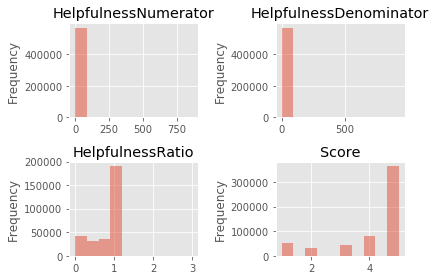

In [41]:
fig = plt.figure()

ax1 = fig.add_subplot(2,2,1)
data['HelpfulnessNumerator'].plot.hist(alpha=0.5)
ax1.set_title('HelpfulnessNumerator')

ax2 = fig.add_subplot(2,2,2)
data['HelpfulnessDenominator'].plot.hist(alpha=0.5)
ax2.set_title('HelpfulnessDenominator')

ax3 = fig.add_subplot(2,2,3)
data['HelpfulnessRatio'].plot.hist(alpha=0.5)
ax3.set_title('HelpfulnessRatio')

ax4 = fig.add_subplot(2,2,4)
data['Score'].plot.hist(alpha=0.5)
ax4.set_title('Score')


plt.tight_layout()

plt.show()

The numerator/denominator graphs are not informative at all, we will check the different quantiles of these columns to get a better idea.

In [31]:
print 'Helpfulness Numerator quantiles'
data['HelpfulnessNumerator'].quantile([0.7,0.8,0.9, 0.95, 0.99, 0.995])

Helpfulness Numerator quantiles


0.700     1.0
0.800     2.0
0.900     4.0
0.950     7.0
0.990    19.0
0.995    30.0
Name: HelpfulnessNumerator, dtype: float64

In [32]:
print 'Helpfulness Denominator quantiles'
data['HelpfulnessDenominator'].quantile([0.7,0.8,0.9, 0.95, 0.99, 0.995])

Helpfulness Denominator quantiles


0.700     2.0
0.800     3.0
0.900     5.0
0.950     9.0
0.990    23.0
0.995    35.0
Name: HelpfulnessDenominator, dtype: float64

As seen above, the Helpfulness Numerator/Denominator is heavily congested in one bin, with less then 1% of the reviews having more then 20 reviews. But the other thing to notice is that for some of the reviews, the numerators is higher then the denominator, which doesn't make sense.  We need to look at these data a bit closer.

In [33]:
d_inspect = data[data['HelpfulnessRatio']>1.0]
d_inspect

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,HelpfulnessRatio
44736,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,4,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...,1.5
64421,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,5,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...,3.0


In [50]:
data.shape[0]

568454

Two rows in total has this problem, we will take these two rows out of the dataset.

In [51]:
print '# rows before drop', data.shape[0]
processed_data = data.drop([44736, 64421])
print '# rows after drop', processed_data.shape[0]

# rows before drop 568454
# rows after drop 568452


## save the data out into a csv


In [54]:
processed_data.to_csv(output_location)